In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [23]:
from multidocqa.utils import parse_coliee_xml_folder

dataset = parse_coliee_xml_folder("../data/coliee2025/COLIEE2025statute_data-English/train/",
                                  "../data/processed/train.json")

Parsed 1206 question-article pairs and 1532 articles, saved to ../data/processed/train.json


In [6]:
import json
import tiktoken
from collections import Counter
from transformers import AutoTokenizer

with open("../data/processed/train.json", "r") as f:
    dataset = json.load(f)
    
with open("../data/coliee2025/COLIEE2025statute_data-English/text/civil_code_en.json", "r") as f:
    civil_code = json.load(f)
    

/home/nchakrabor/projects/multidocqa/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
civil_code[0]

{'number': '1',
 'content': ' (1) Private rights must be congruent with the public welfare. (2) The exercise of rights and performance of duties must be done in good faith. (3) Abuse of rights is not permitted. (Standards for Construction)'}

100%|██████████| 1206/1206 [00:00<00:00, 8304.15it/s]


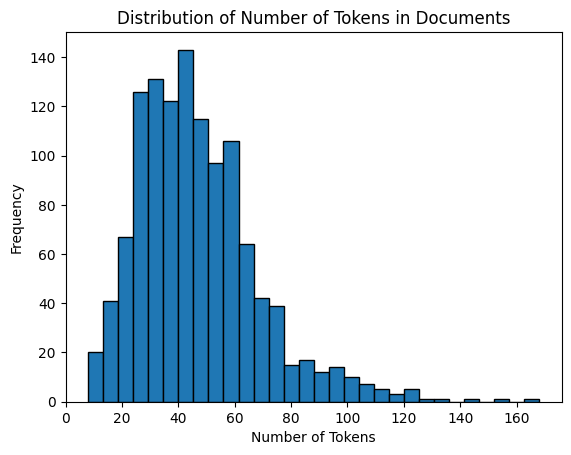

100%|██████████| 782/782 [00:00<00:00, 4278.08it/s]


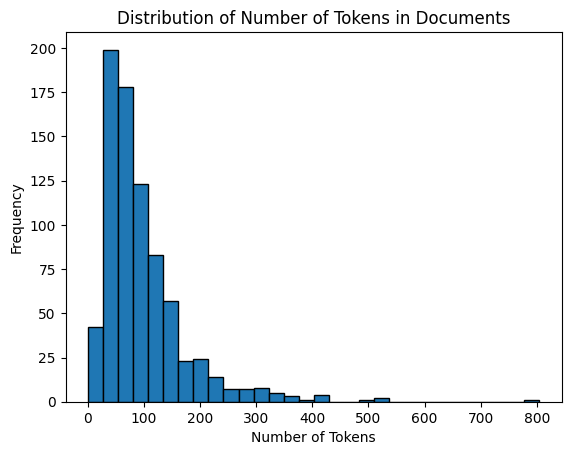

In [11]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Initialize tokenizer for meta-llama/Llama-3.1-8B-Instruct
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")

def analyze_token_distribution(documents):
    """
    Analyzes the token distribution for a list of documents.

    Args:
        documents (list): A list of dictionaries, where each dictionary represents a document with a 'question' key.

    Returns:
        None
    """
    import matplotlib.pyplot as plt

    # Calculate the number of tokens for each document
    token_counts = [len(tokenizer.encode(doc, add_special_tokens=False)) for doc in tqdm(documents)]

    # Plot the distribution of token counts
    plt.hist(token_counts, bins=30, edgecolor='black')
    plt.title("Distribution of Number of Tokens in Documents")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")
    plt.show()

analyze_token_distribution([doc["question"] for doc in dataset])
analyze_token_distribution([doc["content"] for doc in civil_code])

In [12]:
len(tokenizer.encode("\n".join(doc["content"] for doc in civil_code), add_special_tokens=False))

76250

In [20]:
from multidocqa.utils import parse_civil_code

articles = parse_civil_code("../data/coliee2025/COLIEE2025statute_data-English/text/civil_code_en-1to724-2.txt",
                            "../data/coliee2025/COLIEE2025statute_data-English/text/civil_code_en.json",)

Extracted 782 articles, saved to ../data/coliee2025/COLIEE2025statute_data-English/text/civil_code_en.json


In [5]:
articles_dict = {article['number']: article['content'] for article in articles}

In [18]:
test_article = dataset[0]['articles'][0]
articles_dict[test_article['number']], test_article['content']

(" (1) If the validity of a manifestation of intention that an agent has made to the other party is to be influenced by the absence of intention; by mistake, fraud, or duress; or by the knowledge of or negligence in not knowing of a particular circumstance; whether or not any such fact was present is decided as it concerns the agent. (2) If the validity of a manifestation of intention that the other party has made to the agent is to be influenced by the recipient's knowledge of or negligence in not knowing of a particular circumstance, whether or not any such fact was present is decided as it concerns the agent. (3) If an agent who has been entrusted with performing a specific juridical act performs that act, the principal may not assert that the agent did not know of any particular circumstance of which the principal knew. The same applies to any circumstance of which the principal did not know due to the principal's own negligence. (Agent's Capacity to Act)",
 " (1) If the validity o